In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


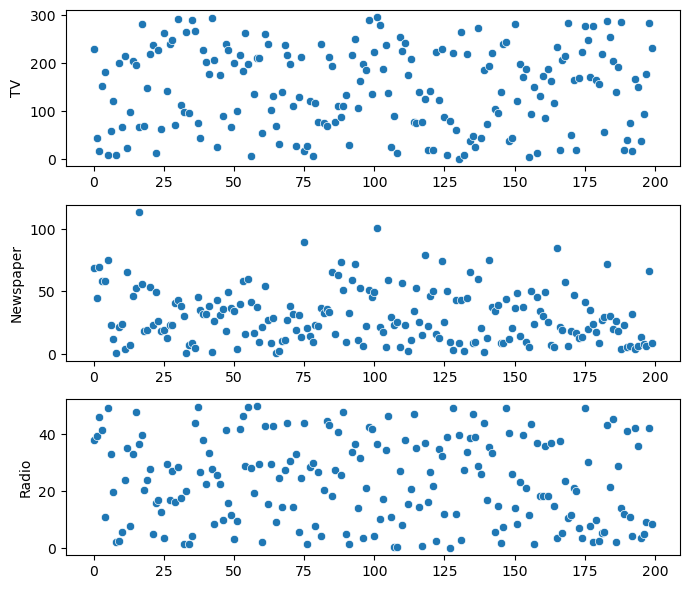

In [7]:
fig, axs = plt.subplots(3, figsize = (7,6))
plt1 = sns.scatterplot(data['TV'], ax = axs[0])
plt2 = sns.scatterplot(data['Newspaper'], ax = axs[1])
plt3 = sns.scatterplot(data['Radio'], ax = axs[2])
plt.tight_layout()

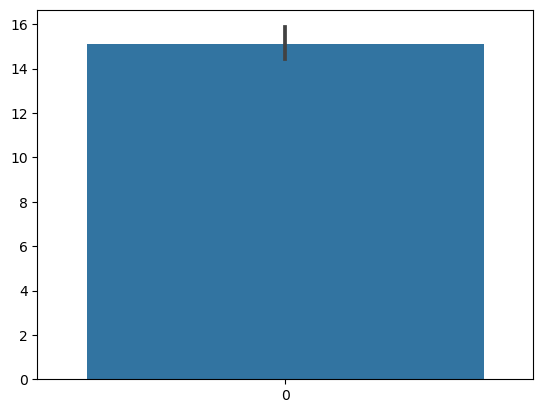

In [8]:
sns.barplot(data['Sales'])
plt.show()

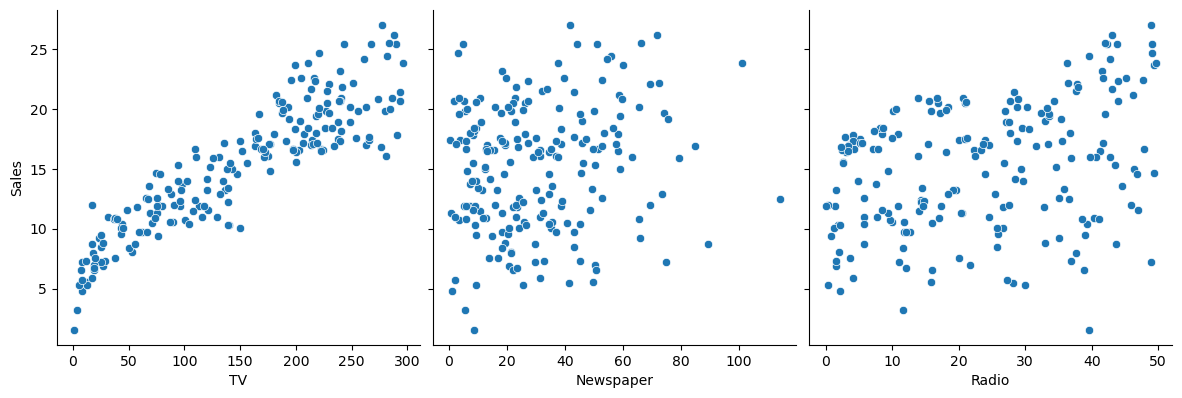

In [9]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

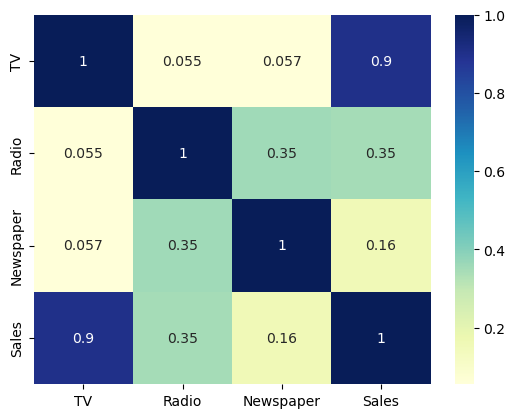

In [10]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [11]:
X = data['TV']
y = data['Sales']

### Split the data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 42)

In [13]:
X_train.head()

2       17.2
77     120.5
46      89.7
187    191.1
191     75.5
Name: TV, dtype: float64

In [14]:
y_train.head()

2      12.0
77     14.2
46     10.6
187    17.3
191    11.9
Name: Sales, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [16]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [25]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 1, 1]
conf_matrix = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1 1]
 [1 3]]


In [29]:
from sklearn.metrics import classification_report
y_test = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 1, 1]
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.75      0.75      0.75         4

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



In [30]:
accuracy_score(y_test, y_pred)

0.6666666666666666